In [ ]:
# spacy needs to run in another conda environment (probably issue of the use of CPU with conda & spacy for mac)
# in terminal conda activate nlp (env name)
#import spacy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from datetime import datetime
from collections import Counter
from scipy import stats

### Preliminary analysis for the final dataset

#### Prepare the dataset

In [ ]:
df = pd.read_csv('3_fewshot_classification_data_final.csv')
df.drop(labels = ['Unnamed: 0', 'keep'], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)

In [ ]:
len(df)

87991

In [ ]:
df.head()

,index,filename,text_original,year,month,outlet,country,text_clean,south
0,9029,"'Empire' may yet fade, as climate catastrophe ...","\r\nNovember 1, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 1, 2021 Copyright 2021 The New Zealan...",0
1,9034,'Native peoples hold key to climate solutions'...,"\r\nNovember 2, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 2, 2021 Copyright 2021 The New Zealan...",0
2,9039,'Shock' after car-parks idea.rtf,"\r\nNovember 4, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 4, 2021 Copyright 2021 The New Zealan...",0
3,9043,$150m for Pacific projects.rtf,"\r\nAugust 16, 2019\r\n\r\n\r\nCopyright 2019 ...",2019,8,The New Zealand Herald,New Zealand,"August 16, 2019 Copyright 2019 The New Zealand...",0
4,9051,_Achievable and affordable__ PM Jacinda Ardern...,"\r\nJanuary 31, 2021 Sunday\r\n\r\n\r\nCopyrig...",2021,1,The New Zealand Herald,New Zealand,"January 31, 2021 Sunday Copyright 2021 The New...",0


In [ ]:
names = ["climate change", "global warming", "greenhouse effect", "climate warming",
         "climatic change", "greenhouse warming", "warming climate", "changing climate", "warmer climate",
         "planetary warming", "climatic disruption", "climate catastrophe", "climate chaos", "climate crisis",
         "climate disaster", "climate emergency", "global heating", "climate breakdown", "climate threat"]

In [ ]:
def words_present_anywhere(text, query):
    import re
    text = str(text).lower()
    newtext = re.sub(r'[^\w\s]', ' ', text)
    newtext = " ".join(newtext.split())
    query = str(query).lower()
    count = newtext.count(query)
    return count

In [ ]:
for name in names:
    df[name] = df['text_clean'].apply(words_present_anywhere, args=(name,))

In [ ]:
df["label_sum"] = df.iloc[:,9:28].sum(axis=1)
df["neutral"] = df.iloc[:,9:19].sum(axis=1)
df["urgent"] = df.iloc[:,19:28].sum(axis=1)
#df.drop(df[df['label_sum'] < 2].index, inplace = True)
#df = df.reset_index().drop(['level_0'], axis=1)

In [ ]:
df["climate/climatic change"] = df["climate change"] + df["climatic change"]

In [ ]:
len(df)

87991

In [ ]:
df.head()

,index,filename,text_original,year,month,outlet,country,text_clean,south,climate change,global warming,greenhouse effect,climate warming,climatic change,greenhouse warming,warming climate,changing climate,warmer climate,planetary warming,climatic disruption,climate catastrophe,climate chaos,climate crisis,climate disaster,climate emergency,global heating,climate breakdown,climate threat,label_sum,neutral,urgent
0,9029,"'Empire' may yet fade, as climate catastrophe ...","\r\nNovember 1, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 1, 2021 Copyright 2021 The New Zealan...",0,2,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,7,4,3
1,9034,'Native peoples hold key to climate solutions'...,"\r\nNovember 2, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 2, 2021 Copyright 2021 The New Zealan...",0,1,2,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,7,3,4
2,9039,'Shock' after car-parks idea.rtf,"\r\nNovember 4, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 4, 2021 Copyright 2021 The New Zealan...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,9043,$150m for Pacific projects.rtf,"\r\nAugust 16, 2019\r\n\r\n\r\nCopyright 2019 ...",2019,8,The New Zealand Herald,New Zealand,"August 16, 2019 Copyright 2019 The New Zealand...",0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0
4,9051,_Achievable and affordable__ PM Jacinda Ardern...,"\r\nJanuary 31, 2021 Sunday\r\n\r\n\r\nCopyrig...",2021,1,The New Zealand Herald,New Zealand,"January 31, 2021 Sunday Copyright 2021 The New...",0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0


In [ ]:
for name in names:
    df[name+"_binary"] = df.apply(lambda x: 0 if x[name] == 0 else 1, axis=1)

df["neutral_binary"] = df.apply(lambda x: 0 if x["neutral"] == 0 else 1, axis=1)
df["urgent_binary"] = df.apply(lambda x: 0 if x["urgent"] == 0 else 1, axis=1)

In [ ]:
df["climate/climatic change_binary"] = df.apply(lambda x: 0 if x["climate/climatic change"] == 0 else 1, axis=1)

In [ ]:
df["outlet"].value_counts(normalize=True)

Guardian                     0.155868
The Australian               0.115853
The New York Times           0.094282
The Sydney Morning Herald    0.086634
Hindu                        0.073758
Toronto Star                 0.069325
The Times                    0.067291
Times of India               0.065723
GlobeMail                    0.060518
The Washington Post          0.058142
The New Zealand Herald       0.050846
The Press                    0.035504
The Nation                   0.022491
Bangkok Post                 0.020650
The Star                     0.018422
Sunday Times                 0.004694
Name: outlet, dtype: float64

In [ ]:
df["outlet"].value_counts()

Guardian                     13715
The Australian               10194
The New York Times            8296
The Sydney Morning Herald     7623
Hindu                         6490
Toronto Star                  6100
The Times                     5921
Times of India                5783
GlobeMail                     5325
The Washington Post           5116
The New Zealand Herald        4474
The Press                     3124
The Nation                    1979
Bangkok Post                  1817
The Star                      1621
Sunday Times                   413
Name: outlet, dtype: int64

In [ ]:
df.to_csv("5_descriptive_analysis_data_analyzed.csv")
df.to_csv('5_descriptive_analysis_data_analyzed.txt', sep='\t', index=False)

In [ ]:
#load data set - just for Valerie using Drive files
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/data/5_descriptive_analysis_data_analyzed.csv')
#df.head()

Mounted at /content/drive


,Unnamed: 0,index,filename,text_original,year,month,outlet,country,text_clean,south,...,climate disaster_binary,climate emergency_binary,global heating_binary,climate breakdown_binary,climate threat_binary,neutral_binary,urgent_binary,date_new,climate/climatic change,climate/climatic change_binary
0,0,9029,"'Empire' may yet fade, as climate catastrophe ...","\r\nNovember 1, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 1, 2021 Copyright 2021 The New Zealan...",0,...,0,0,0,0,0,1,1,2021-11-01,2,1
1,1,9034,'Native peoples hold key to climate solutions'...,"\r\nNovember 2, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 2, 2021 Copyright 2021 The New Zealan...",0,...,0,0,0,0,0,1,1,2021-11-01,1,1
2,2,9039,'Shock' after car-parks idea.rtf,"\r\nNovember 4, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 4, 2021 Copyright 2021 The New Zealan...",0,...,0,0,0,0,0,1,0,2021-11-01,1,1
3,3,9043,$150m for Pacific projects.rtf,"\r\nAugust 16, 2019\r\n\r\n\r\nCopyright 2019 ...",2019,8,The New Zealand Herald,New Zealand,"August 16, 2019 Copyright 2019 The New Zealand...",0,...,0,0,0,0,0,1,0,2019-08-01,4,1
4,4,9051,_Achievable and affordable__ PM Jacinda Ardern...,"\r\nJanuary 31, 2021 Sunday\r\n\r\n\r\nCopyrig...",2021,1,The New Zealand Herald,New Zealand,"January 31, 2021 Sunday Copyright 2021 The New...",0,...,0,0,0,0,0,1,0,2021-01-01,5,1


In [ ]:
#write out subset of data just for Valerie for time series via R
#output = df.loc[:, ~df.columns.isin(["Unnamed: 0", "index", "filename", "text_original", "text_clean"])]
#data_dir = "/content/drive/MyDrive/data"
#output.to_csv(f"{data_dir}/output.csv")

#### RQ1: How often do news media use neutral vs. urgent labels for climate change?

In [ ]:
round(df["neutral_binary"].value_counts(normalize=True)*100,1)

1    98.2
0     1.8
Name: neutral_binary, dtype: float64

In [ ]:
round(df["urgent_binary"].value_counts(normalize=True)*100,1)

0    90.5
1     9.5
Name: urgent_binary, dtype: float64

In [ ]:
df2 = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
        "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
        "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
         "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary",
        "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary"]]

In [ ]:
c = list()
c = df2.columns.tolist()
for i in range(len(c)): #Loop every column
        c[i] = c[i].replace("_binary",'')

df2.columns = c

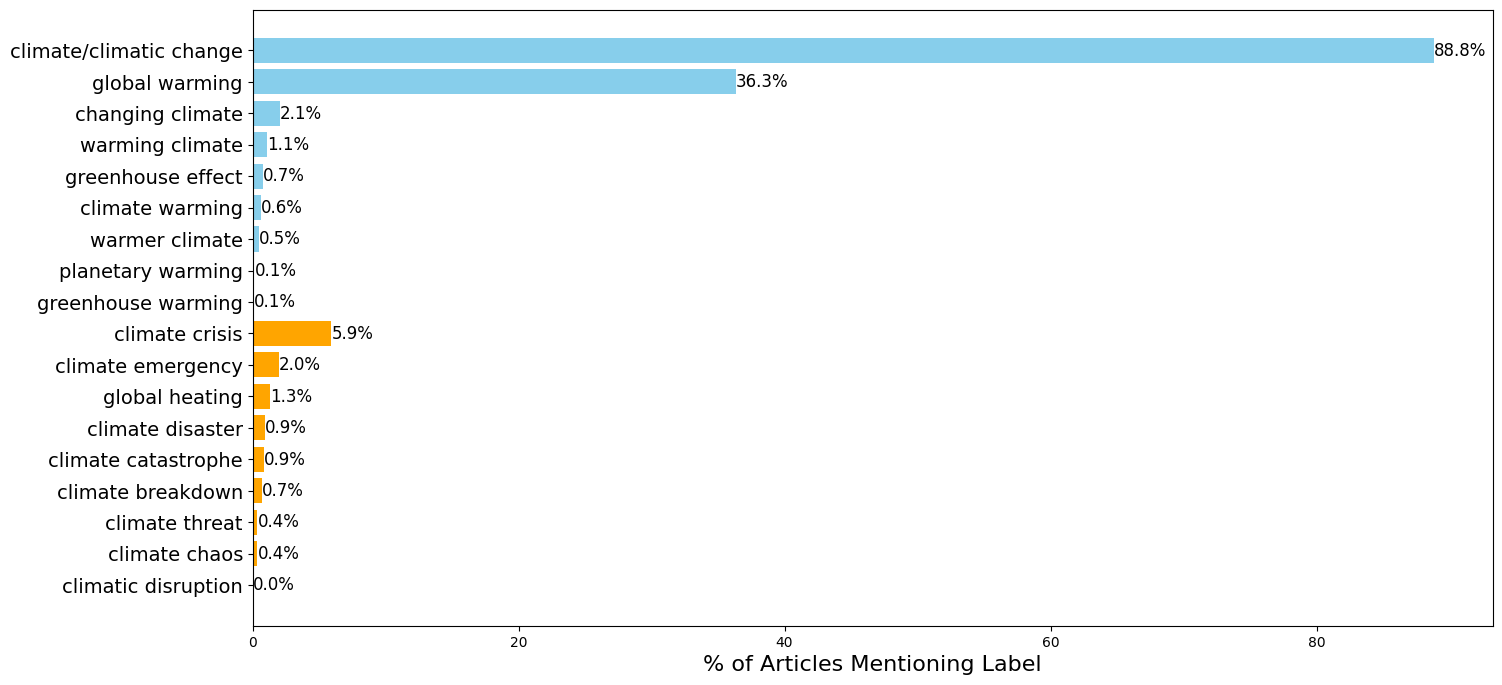

In [ ]:
percentages = (df2.sum() / len(df2)) * 100
percentages1 = percentages[["climate/climatic change", "global warming", "greenhouse effect", "climate warming",
         "greenhouse warming", "warming climate", "changing climate",
                           "warmer climate", "planetary warming"]].sort_values(ascending=True)
percentages2 = percentages[["climatic disruption",
         "climate catastrophe", "climate chaos", "climate crisis", "climate disaster",
        "climate emergency", "global heating", "climate breakdown", "climate threat"]].sort_values(ascending=True)
percentages = pd.concat([percentages2,percentages1])


#colors = ['skyblue' if i < 7 else 'orange' for i in range(len(percentages))]
colors=['skyblue' if col in ["climate/climatic change", "global warming", "greenhouse effect", "climate warming",
         "greenhouse warming", "warming climate","changing climate",
                        "warmer climate", "planetary warming"] else 'orange' for col in percentages.index]

plt.figure(figsize=(16, 8))
bars = plt.barh(percentages.index, percentages.values, color=colors)

for bar, percentage in zip(bars, percentages.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center', clip_on = True, fontsize = 12)


#plt.figure(figsize=(10, 8))
#percentages.plot(kind='barh')
plt.xlabel('% of Articles Mentioning Label', fontsize = 16, y=-0.25)
plt.yticks(fontsize = 14)
#plt.xticks(rotation=45)


#just for Valerie to check image
#images_dir = '/content/drive/MyDrive/images'
#plt.savefig(f"{images_dir}/Fig1.png", dpi = 300, bbox_inches = "tight")
plt.show()

#### RQ2: How does the use of labels for climate change develop over time?

In [ ]:
df['date_new'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df["date_new"]= pd.to_datetime(df["date_new"])
#df['date_new'] = df['date'].apply(lambda dt: dt.replace(day = 1))

In [ ]:
def plotyear(ax,name,colour):
    labeltime = df[['date_new', name+"_binary"]].groupby(['date_new']).sum()
    labeltime["number_article"]=df[['date_new', 'filename']].groupby(['date_new']).count()
    labeltime["percentage_"+name] = labeltime[name+'_binary']/labeltime["number_article"]*100
    labeltime.reset_index(inplace=True)

    ax.fill_between(labeltime['date_new'], labeltime['percentage_'+name], color=colour, alpha=0.3)
    ax.plot(labeltime['date_new'], labeltime['percentage_'+name], color=colour, label=name)
    years = [2007,2010,2013,2016,2019,2022]
    years=[str(i) for i in years]
    years=pd.to_datetime(years,format="%Y").strftime('%Y')
    p = [0,25,50,75,100]
    ax.set_xticks(years,years,fontsize=12)
    ax.set_yticks(p,p,fontsize=12)
    ax.set_ylabel('% of Articles Mentioning Label',fontsize=14)
    ax.set_title(name,fontsize=16)

<ipython-input-34-3880765f0a50>:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


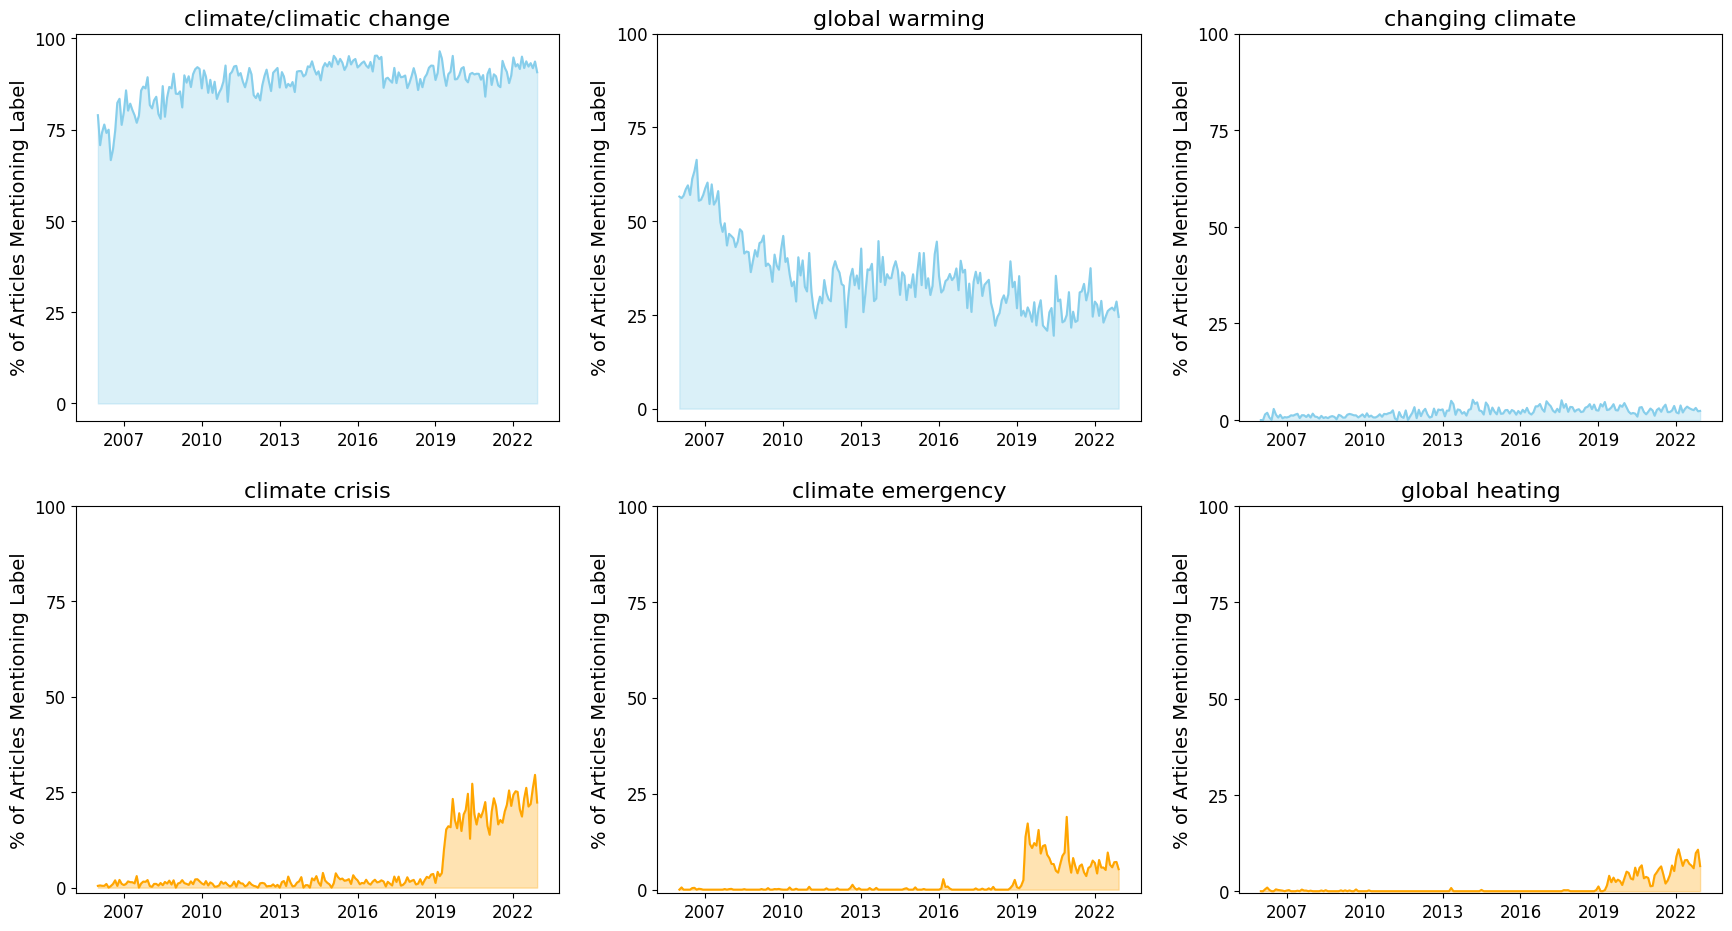

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, layout='constrained', figsize=(18,10))
fig.tight_layout(pad=4.0)
#plt.ylabel('% of Articles Mentioning Label')
plotyear(axs[0, 0],"climate/climatic change","skyblue")
plotyear(axs[0, 1],"global warming","skyblue")
plotyear(axs[0, 2],"changing climate","skyblue")
plotyear(axs[1, 0],"climate crisis","orange")
plotyear(axs[1, 1],"climate emergency","orange")
plotyear(axs[1, 2],"global heating","orange")
#just for Valerie, to save image
#plt.savefig(f"{images_dir}/Fig2.png", dpi = 300, bbox_inches = "tight")

In [ ]:
crisistime = df[['year', "climate crisis_binary", "global warming_binary"]].groupby(['year']).sum()
crisistime["number_article"] = df[['year', 'filename']].groupby(['year']).count()
crisistime["percentage_climate crisis"] = round(crisistime['climate crisis_binary']/crisistime["number_article"]*100,1)
crisistime["percentage_global warming"] = round(crisistime['global warming_binary']/crisistime["number_article"]*100,1)

In [ ]:
crisistime

,climate crisis_binary,global warming_binary,number_article,percentage_climate crisis,percentage_global warming
year,,,,,
2006,35,2098,3601,1.0,58.3
2007,113,4280,8055,1.4,53.1
2008,62,2678,6199,1.0,43.2
2009,120,3285,8165,1.5,40.2
2010,49,1813,4944,1.0,36.7
2011,44,1414,4656,0.9,30.4
2012,19,1077,3219,0.6,33.5
2013,44,1196,3329,1.3,35.9
2014,63,1321,3823,1.6,34.6


#### RQ3: How does the use of labels for climate change vary across countries?

complex imagesgrid: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-nested-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

##### Country-specific differences

In [ ]:
#Check out percentages of labels across specific countries
labels_country = df[['country', "neutral_binary", "urgent_binary", "climate/climatic change_binary",
                     "global warming_binary", "climate crisis_binary", "climate emergency_binary"]].groupby(['country']).sum()
labels_country["number_article"] = df[['country', 'filename']].groupby(['country']).count()
labels_country["percentage_neutral"] = round(labels_country['neutral_binary']/labels_country["number_article"]*100,1)
labels_country["percentage_climate/climatic change"] = round(labels_country['climate/climatic change_binary']/labels_country["number_article"]*100,1)
labels_country["percentage_global warming"] = round(labels_country['global warming_binary']/labels_country["number_article"]*100,1)
labels_country["percentage_urgent"] = round(labels_country['urgent_binary']/labels_country["number_article"]*100,1)
labels_country["percentage_climate crisis"] = round(labels_country['climate crisis_binary']/labels_country["number_article"]*100,1)
labels_country["percentage_climate emergency"] = round(labels_country['climate emergency_binary']/labels_country["number_article"]*100,1)
labels_country = labels_country.loc[:, ~labels_country.columns.isin(["neutral_binary", "urgent_binary", "climate/climatic change_binary",
                     "global warming_binary", "number_article", "climate crisis_binary", "climate emergency_binary"])]

In [ ]:
labels_country

,percentage_neutral,percentage_climate/climatic change,percentage_global warming,percentage_urgent,percentage_climate crisis,percentage_climate emergency
country,,,,,,
Australia,99.1,94.0,29.2,3.9,2.0,0.8
Canada,98.1,88.0,35.9,8.1,5.2,1.5
India,98.6,84.5,32.0,3.6,2.5,0.5
New Zealand,98.1,89.2,30.6,8.1,3.9,3.0
South Africa,98.6,88.9,34.8,7.6,5.0,1.0
Thailand,99.1,82.5,48.6,8.2,5.0,0.7
UK,96.7,89.4,33.1,19.6,12.9,4.7
USA,98.9,87.3,54.9,10.1,6.3,1.1


###### Country-specific differences for neutral labels

In [ ]:
#Conduct hi-Square test of labels across countries (neutral)
crosstab = pd.crosstab(df['country'], df['neutral_binary'])
crosstab

neutral_binary,0,1
country,,
Australia,160,17657
Canada,220,11205
India,175,12098
New Zealand,144,7454
South Africa,28,2006
Thailand,35,3761
UK,639,18997
USA,151,13261


In [ ]:
#Get result of Chi-Square test
print("Critical test value = ", stats.chi2_contingency(crosstab).statistic,
      "with p = ", round(stats.chi2_contingency(crosstab).pvalue, 6),
      "for", stats.chi2_contingency(crosstab).dof, "degrees of freedom")

Critical test value =  388.1721026674071 with p =  0.0 for 7 degrees of freedom


In [ ]:
#Use Bonferroni-adjusted test to compare differences across countries for group-specific differences
dummies = pd.get_dummies(df["country"])
dummies.head()
for series in dummies:
    nl = "\n"

    crosstab = pd.crosstab(dummies[f"{series}"], df['neutral_binary'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {round(p, 4)}{nl}Degrees of freedom= {dof}{nl}")

###### Country-specific differences for urgent labels

In [ ]:
#Conduct hi-Square test of labels across countries (urgent)
crosstab = pd.crosstab(df['country'], df['urgent_binary'])
crosstab

urgent_binary,0,1
country,,
Australia,17123,694
Canada,10501,924
India,11828,445
New Zealand,6986,612
South Africa,1879,155
Thailand,3484,312
UK,15793,3843
USA,12061,1351


In [ ]:
#Get result of Chi-Square test
print("Critical test value = ", stats.chi2_contingency(crosstab).statistic,
      "with p = ", round(stats.chi2_contingency(crosstab).pvalue, 6),
      "for", stats.chi2_contingency(crosstab).dof, "degrees of freedom")

Critical test value =  3534.527235119894 with p =  0.0 for 7 degrees of freedom


In [ ]:
#Use Bonferroni-adjusted test to compare differences across countries for group-specific differences
dummies = pd.get_dummies(df["country"])
dummies.head()
for series in dummies:
    nl = "\n"

    crosstab = pd.crosstab(dummies[f"{series}"], df['neutral_binary'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {round(p, 4)}{nl}Degrees of freedom= {dof}{nl}")

neutral_binary     0      1
Australia                  
0               1392  68782
1                160  17657 

Chi2 value= 96.02512776543539
p-value= 0.0
Degrees of freedom= 1

neutral_binary     0      1
Canada                     
0               1332  75234
1                220  11205 

Chi2 value= 1.877546195754912
p-value= 0.1706
Degrees of freedom= 1

neutral_binary     0      1
India                      
0               1377  74341
1                175  12098 

Chi2 value= 9.174108007179905
p-value= 0.0025
Degrees of freedom= 1

neutral_binary     0      1
New Zealand                
0               1408  78985
1                144   7454 

Chi2 value= 0.7479783846143396
p-value= 0.3871
Degrees of freedom= 1

neutral_binary     0      1
South Africa               
0               1524  84433
1                 28   2006 

Chi2 value= 1.5802535942338087
p-value= 0.2087
Degrees of freedom= 1

neutral_binary     0      1
Thailand                   
0               1517  82678
1 

###### Plot Country-specific differences

In [ ]:
def plotcountry(gss,co):

    country = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
             "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary",
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == co]

    c = list()
    c = country.columns.tolist()
    for i in range(len(c)): #Loop every column
            c[i] = c[i].replace("_binary",'')

    country.columns = c

    country["other neutral"] = country[["greenhouse effect","climate warming",
                            "greenhouse warming", "warming climate", "warmer climate",
                           "planetary warming"]].sum(axis=1)
    country["other neutral"] = country.apply(lambda x: 0 if x["other neutral"] == 0 else 1, axis=1)

    country["other urgent"] = country[["climatic disruption","climate catastrophe",
                                       "climate chaos","climate disaster","climate breakdown",
                                       "climate threat"]].sum(axis=1)
    country["other urgent"] = country.apply(lambda x: 0 if x["other urgent"] == 0 else 1, axis=1)

    country.reset_index(inplace=True)
    country.drop(labels = ['index'], axis = 1, inplace = True)

    percentage = (country.sum() / len(country)) * 100

    #fig = plt.figure(layout='constrained')
    #plt.yticks([])
    gs = GridSpecFromSubplotSpec(2, 2, subplot_spec=gss)

    big_subplot = fig.add_subplot(gs[1, :])
    big_subplot.bar(percentage[["neutral","urgent"]].index, percentage[["neutral","urgent"]].values,
           color=["skyblue","orange"])
    plt.title(co, weight='bold', y=-0.25)

    cmap = plt.get_cmap('tab20c')
    top_left_subplot = fig.add_subplot(gs[0, 0])
    top_left_subplot.bar(percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].index,
            percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].values,
            label=percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].index,
            color=[cmap(i) for i in range(4)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])

    top_right_subplot = fig.add_subplot(gs[0, 1])
    top_right_subplot.bar(percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index,
            percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].values,
            label = percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index,
            color=[cmap(i) for i in range(4,8)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])
    plt.yticks([])

<ipython-input-199-b556d8c304be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country["other neutral"] = country[["greenhouse effect","climate warming",


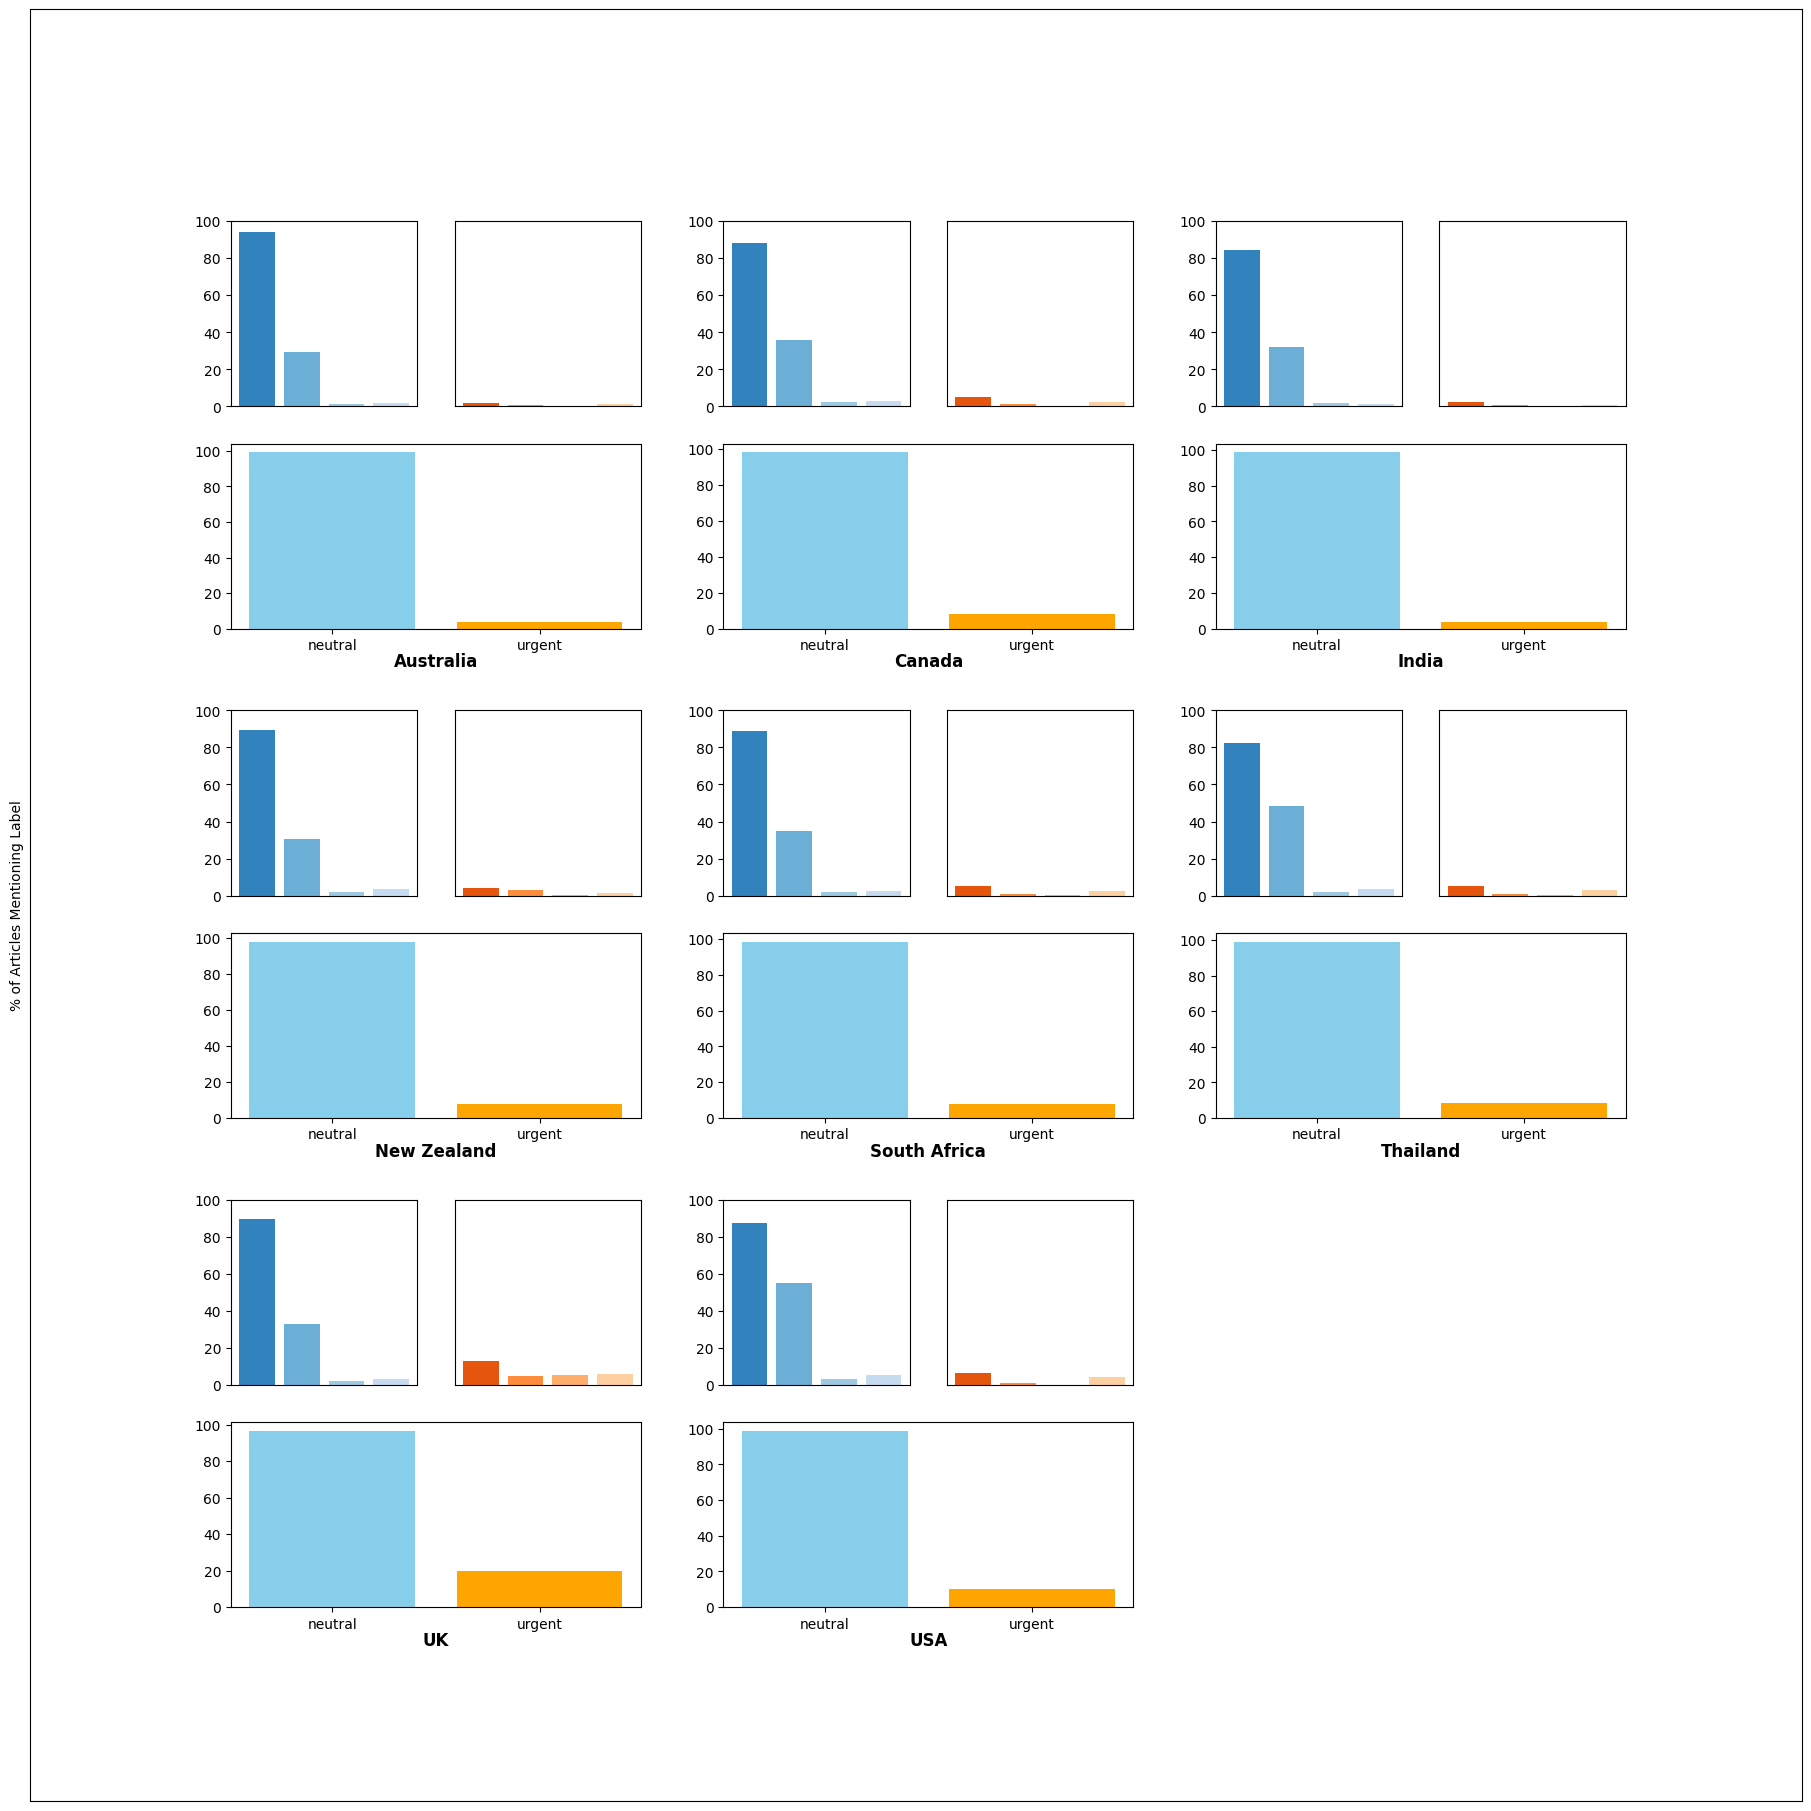

In [ ]:
fig = plt.figure(layout='constrained', figsize=(18, 18))
plt.ylabel('% of Articles Mentioning Label')
plt.xticks([])
plt.yticks([])
gs = GridSpec(3, 3)

plotcountry(gs[0, 0],"Australia")
plotcountry(gs[0, 1],"Canada")
plotcountry(gs[0, 2],"India")
plotcountry(gs[1, 0],"New Zealand")
plotcountry(gs[1, 1],"South Africa")
plotcountry(gs[1, 2],"Thailand")
plotcountry(gs[2, 0],"UK")
plotcountry(gs[2, 1],"USA")

#gs.update(wspace=0.2, hspace = 0.2)
#plt.legend()
#plt.tight_layout(pad=10)
plt.show()

### Country- and outlet-specific differences


In [ ]:
#Changed to binary occurence instead of sums, seeing that this is the basis of comparison for other analyses before
media = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
            "greenhouse warming_binary", "warming climate_binary", "changing climate_binary", "warmer climate_binary", "planetary warming_binary",
            "climatic disruption_binary", "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary",
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
            "urgent_binary", "neutral_binary", "outlet"]].groupby(["outlet"]).sum()
media["other neutral_binary"] = media[["climate warming_binary","greenhouse effect_binary", "warmer climate_binary",
                                "planetary warming_binary", "greenhouse warming_binary", "warming climate_binary",
                                       "changing climate_binary"]].sum(axis=1)
media["other urgent_binary"] = media[["climatic disruption_binary","climate catastrophe_binary",
                                   "climate chaos_binary","climate disaster_binary","climate breakdown_binary",
                                   "climate threat_binary", "global heating_binary"]].sum(axis=1)
media["number_article"] = df[['outlet', 'filename']].groupby(['outlet']).count()
media2 = media[["climate/climatic change_binary", "global warming_binary", "other neutral_binary", "climate crisis_binary",
               "climate emergency_binary", "other urgent_binary", "urgent_binary", "neutral_binary"]]
media2 = round((media2.div(media.number_article, axis=0))*100,1)
media2
#media.reset_index(inplace=True)

,climate/climatic change_binary,global warming_binary,other neutral_binary,climate crisis_binary,climate emergency_binary,other urgent_binary,urgent_binary,neutral_binary
outlet,,,,,,,,
Bangkok Post,83.0,47.9,4.7,5.9,1.0,4.3,9.4,99.3
GlobeMail,87.8,35.8,4.8,3.2,1.0,1.8,5.4,98.5
Guardian,91.1,32.7,5.1,17.5,5.9,15.8,25.6,96.3
Hindu,84.1,34.1,3.1,2.1,0.4,1.0,3.3,99.4
Sunday Times,88.4,29.8,6.1,7.5,1.9,3.9,10.7,98.3
The Australian,94.8,27.4,3.2,1.3,0.6,1.2,2.8,99.5
The Nation,82.1,49.3,6.0,4.1,0.4,3.4,7.2,98.8
The New York Times,87.6,58.4,9.5,6.7,0.9,4.5,10.4,99.0
The New Zealand Herald,88.6,35.7,5.3,3.5,2.3,1.9,6.7,98.6


In [ ]:
print(media2[["urgent_binary"]].sum(axis=1))

outlet
Bangkok Post                  9.4
GlobeMail                     5.4
Guardian                     25.6
Hindu                         3.3
Sunday Times                 10.7
The Australian                2.8
The Nation                    7.2
The New York Times           10.4
The New Zealand Herald        6.7
The Press                    10.0
The Star                      6.8
The Sydney Morning Herald     5.3
The Times                     5.6
The Washington Post           9.6
Times of India                4.0
Toronto Star                 10.5
dtype: float64


###### Country- and outlet-specific differences for neutral labels

In [ ]:
#Conduct hi-Square test of labels across outlets (neutral)
crosstab = pd.crosstab(df['outlet'], df['neutral_binary'])
crosstab

neutral_binary,0,1
outlet,,
Bangkok Post,12,1805
GlobeMail,78,5247
Guardian,508,13207
Hindu,40,6450
Sunday Times,7,406
The Australian,56,10138
The Nation,23,1956
The New York Times,82,8214
The New Zealand Herald,62,4412


In [ ]:
#Get result of Chi-Square test
print("Critical test value = ", stats.chi2_contingency(crosstab).statistic,
      "with p = ", round(stats.chi2_contingency(crosstab).pvalue, 6),
      "for", stats.chi2_contingency(crosstab).dof, "degrees of freedom")

Critical test value =  542.6556150670673 with p =  0.0 for 15 degrees of freedom


In [ ]:
#Use Bonferroni-adjusted test to compare differences across countries for group-specific differences
dummies = pd.get_dummies(df["outlet"])
dummies.head()
for series in dummies:
    nl = "\n"

    crosstab = pd.crosstab(dummies[f"{series}"], df['neutral_binary'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {round(p, 4)}{nl}Degrees of freedom= {dof}{nl}")

neutral_binary     0      1
Bangkok Post               
0               1540  84634
1                 12   1805 

Chi2 value= 12.393993018433582
p-value= 0.0004
Degrees of freedom= 1

neutral_binary     0      1
GlobeMail                  
0               1474  81192
1                 78   5247 

Chi2 value= 2.7442149621790732
p-value= 0.0976
Degrees of freedom= 1

neutral_binary     0      1
Guardian                   
0               1044  73232
1                508  13207 

Chi2 value= 351.6419736783807
p-value= 0.0
Degrees of freedom= 1

neutral_binary     0      1
Hindu                      
0               1512  79989
1                 40   6450 

Chi2 value= 52.53357550831472
p-value= 0.0
Degrees of freedom= 1

neutral_binary     0      1
Sunday Times               
0               1545  86033
1                  7    406 

Chi2 value= 0.0
p-value= 1.0
Degrees of freedom= 1

neutral_binary     0      1
The Australian             
0               1496  76301
1                 56  

###### Country- and outlet-specific differences for urgent labels

In [ ]:
#Conduct hi-Square test of labels across outlets (neutral)
crosstab = pd.crosstab(df['outlet'], df['urgent_binary'])
crosstab

urgent_binary,0,1
outlet,,
Bangkok Post,1647,170
GlobeMail,5039,286
Guardian,10203,3512
Hindu,6275,215
Sunday Times,369,44
The Australian,9904,290
The Nation,1837,142
The New York Times,7435,861
The New Zealand Herald,4174,300


In [ ]:
#Get result of Chi-Square test
print("Critical test value = ", stats.chi2_contingency(crosstab).statistic,
      "with p = ", round(stats.chi2_contingency(crosstab).pvalue, 6),
      "for", stats.chi2_contingency(crosstab).dof, "degrees of freedom")

Critical test value =  5620.95593815615 with p =  0.0 for 15 degrees of freedom


In [ ]:
#Use Bonferroni-adjusted test to compare differences across countries for group-specific differences
dummies = pd.get_dummies(df["outlet"])
dummies.head()
for series in dummies:
    nl = "\n"

    crosstab = pd.crosstab(dummies[f"{series}"], df['neutral_binary'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {round(p, 4)}{nl}Degrees of freedom= {dof}{nl}")

neutral_binary     0      1
Bangkok Post               
0               1540  84634
1                 12   1805 

Chi2 value= 12.393993018433582
p-value= 0.0004
Degrees of freedom= 1

neutral_binary     0      1
GlobeMail                  
0               1474  81192
1                 78   5247 

Chi2 value= 2.7442149621790732
p-value= 0.0976
Degrees of freedom= 1

neutral_binary     0      1
Guardian                   
0               1044  73232
1                508  13207 

Chi2 value= 351.6419736783807
p-value= 0.0
Degrees of freedom= 1

neutral_binary     0      1
Hindu                      
0               1512  79989
1                 40   6450 

Chi2 value= 52.53357550831472
p-value= 0.0
Degrees of freedom= 1

neutral_binary     0      1
Sunday Times               
0               1545  86033
1                  7    406 

Chi2 value= 0.0
p-value= 1.0
Degrees of freedom= 1

neutral_binary     0      1
The Australian             
0               1496  76301
1                 56  

###### Plot country- and outlet-specific differences

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

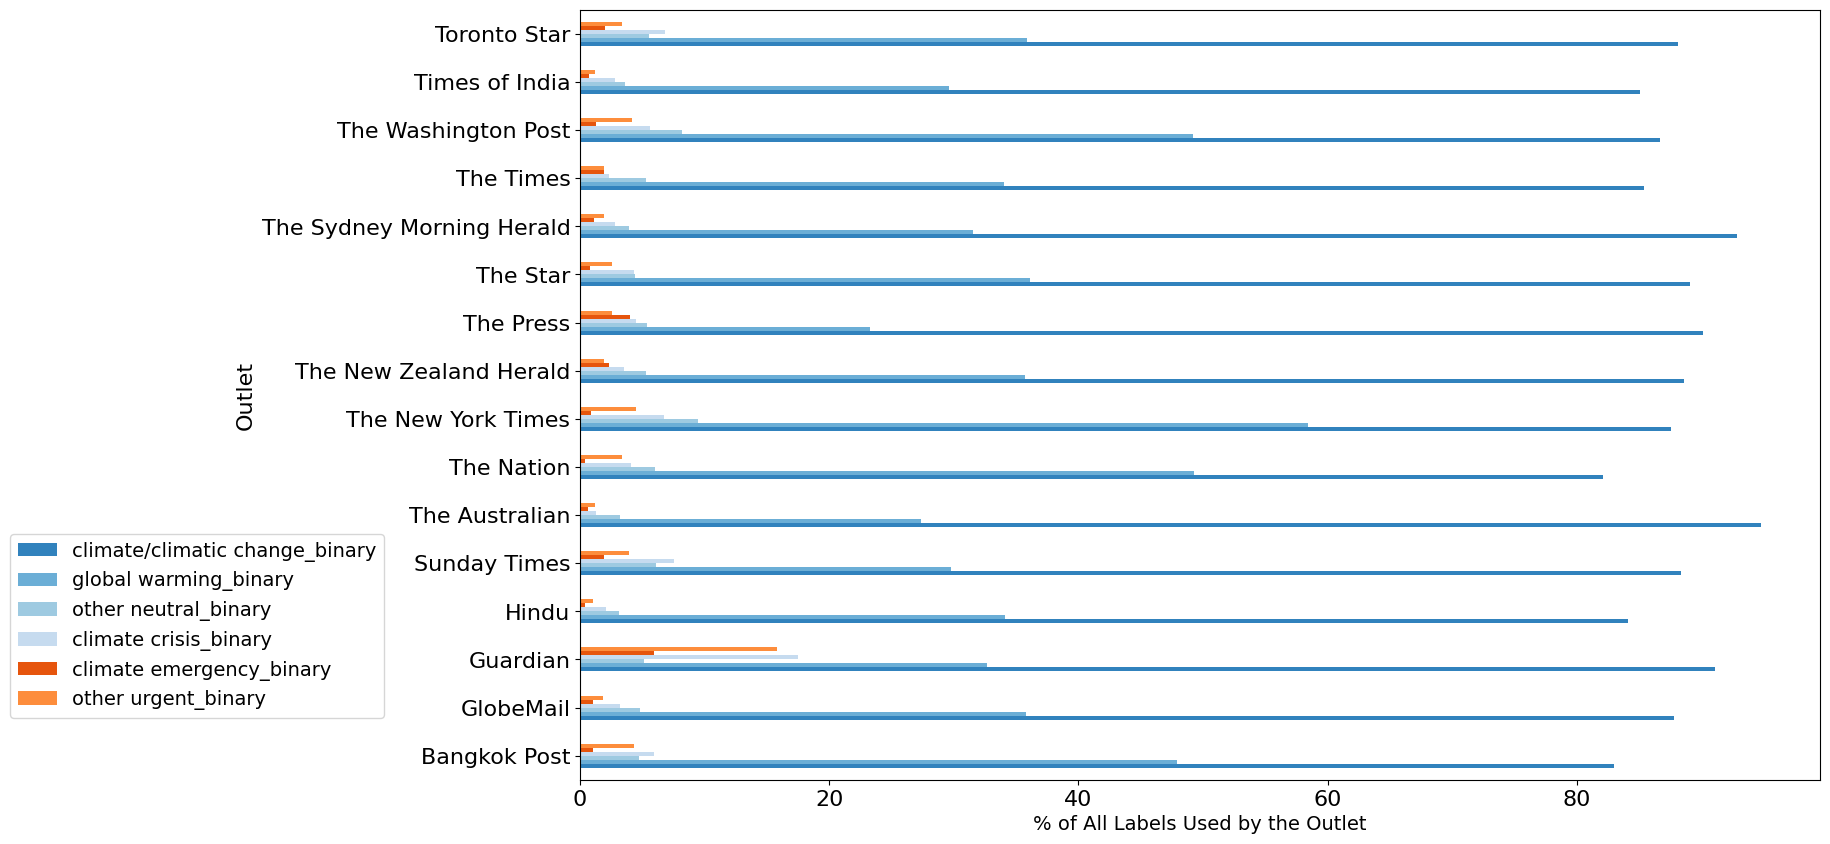

In [211]:
#exclude overall count of urgent/neutral labels
media2 = media2.loc[:, ~media2.columns.isin(["neutral_binary", "urgent_binary", "changing_clim"])]
cmap = plt.get_cmap('tab20c')
#plt.figure(figsize=(16, 8))
media2.plot.barh(color=[cmap(i) for i in range(8)],figsize=(16, 10), )

plt.legend(loc='center right', bbox_to_anchor=(-0.15, 0.2), fontsize = 14)
plt.xlabel("% of All Labels Used by the Outlet", fontsize = 14, y=-0.35)
plt.ylabel("Outlet", fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
#just for Valerie, to save image
#plt.savefig(f"{images_dir}/Fig4.png", dpi = 300, bbox_inches = "tight")